
Cf. Gali (2015) the following log-linearized 3 equation New Keynesian model can be derived, consisting of the "Dynamic IS-equation", "Taylor rule" and "NK Phillips Curve" respectively:

$$
\begin{aligned}
y_t=E_t(y_{t+1})-\frac{1}{\sigma}(i_{t}-E_t(\pi_{t+1})-r^n_t)+e_{y_t}\\

i_t= \rho + \phi_\pi \pi_{t}+\phi_y y_{t}+e_{i_t} \\

\pi_t = \beta E_t(\pi_{t+1})+\kappa y_t + e_{\pi_t}, \quad \kappa \equiv \lambda \left(\sigma + \frac{\varphi+\alpha}{1-\alpha}\right), \quad \lambda \equiv \frac{(1-\theta)(1-\beta \theta)}{\theta} 

\end{aligned}
$$

Here, in the absence of preference and technology shocks, $\rho=r_{n_t}$, as per Gali (2015). Inserting, the Taylor rule becomes:

$$
\begin{aligned}
\rightarrow i_t= r^n_t + \phi_\pi \pi_{t}+\phi_y y_{t}+e_{i_t} 
\end{aligned}
$$

The three shocks to output, inflation and monetary policy, respectively will be assumed to be given by the following AR(1) equations:

\begin{aligned}
e_{y_t} = \rho_y e_{y_{t-1}}+\epsilon_y\\
e_{i_t} = \rho_i e_{i_{t-1}}+\epsilon_i\\
e_{\pi_t} = \rho_v e_{\pi_{t-1}}+\epsilon_{\pi}
\end{aligned}

Where $\epsilon_y,\epsilon_i,\epsilon_{\pi}$ are exogenous variables, and thus the "shock" variables. Their effect is this assumed to have persistance through the AR(1) equations.


The parameter values have been chosen to standard macro-parameter values:
\begin{aligned}
\beta&=0.98, \quad \text{Discount factor}\\
\alpha&=0.5, \quad  \text{Cobb-douglas parameter}\\
\sigma&=2, \quad  \text{inv. elasticity of intertemporal substitution}\\
\varphi&=0.8, \quad  \text{inv. frisch elasticity}\\
\theta&=0.75 , \quad \text{Calvo parameter}\\
\phi_{\pi}&=1.5, \quad  \text{Central bank inflation gap sensitivity}\\
\phi_y&=0.5, \quad  \text{Central bank output gap sensitivity}\\
\rho_y&=0.9, \quad  \text{Autocorrelation output}\\
\rho_{\nu}&=0.5, \quad  \text{Autocorrelation monetary policy}\\
\rho_{\pi}&=0.5, \quad  \text{Autocorrelation inflation}
\end{aligned}




We now simulate the model for a standard shock to the monetary policy (a tightening of the nominal interest rate) and plot the corresponding IRFs.

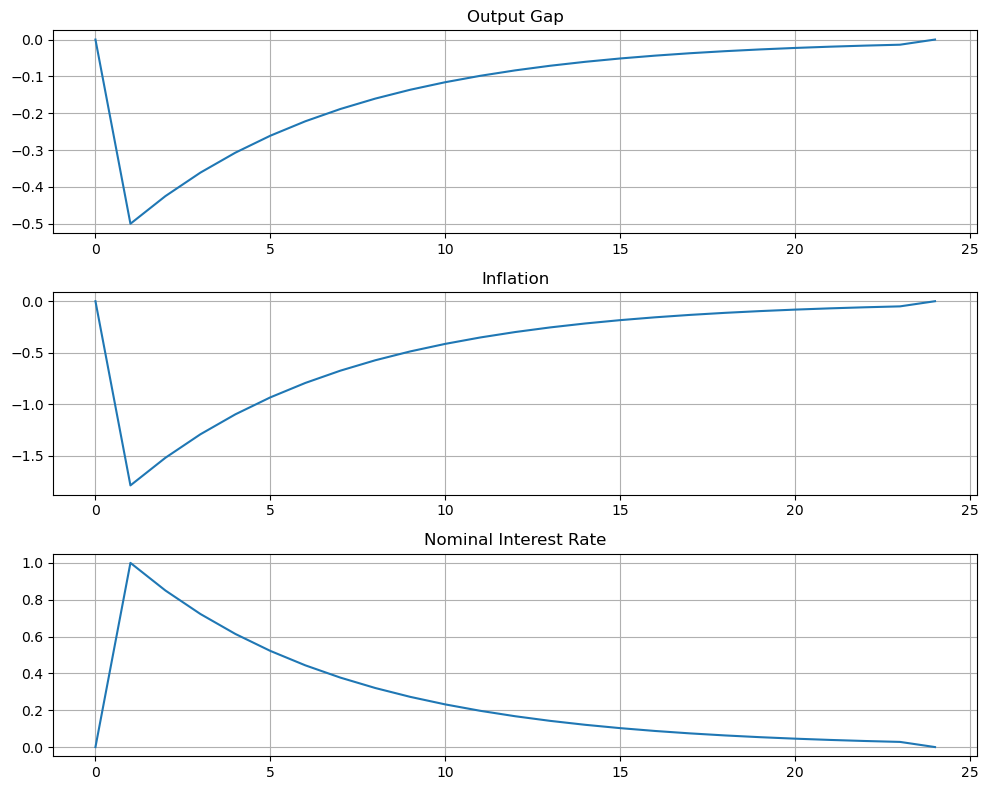

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter



# Model Parameters
beta = 0.98    
alpha = 0.5
sigma = 2     
eta = 1
phi = 5
theta = 0.6
phi_pi = 1.5    
phi_y = 0.5    
rhoy = 0.9    
rhov = 0.85
rhopi = 0.5

# Time period
T = 25

# Shocks
epsilon_pi = np.zeros(T)   
epsilon_y = np.zeros(T)    
epsilon_i = np.zeros(T)  

epi = np.zeros(T)
epy = np.zeros(T)
eppi = np.zeros(T)



# Initialize arrays
pi = np.zeros(T)  # Inflation
y = np.zeros(T)   # Output gap
i = np.zeros(T)   # Nominal interest rate
r_n = 0

# Introduce a shock at time t = 1
epsilon_i = np.zeros(T)  
shock_size = 1  # Size of the shock
epsilon_i[1] = shock_size
    

# Simulate the model
for t in range(1, T-1):
    epy[t] = rhoy*epy[t-1] +epsilon_y[t]
    epi[t] = rhov*epi[t-1] +epsilon_i[t]
    eppi[t] = rhopi*eppi[t-1] +epsilon_pi[t]

    i[t] = r_n + phi_pi * pi[t] + phi_y * y[t] + epi[t]

    y[t] = y[t+1] - (1/sigma) * (i[t] - pi[t+1] - r_n) + epy[t]
    
    pi[t] = beta * pi[t+1]+((sigma+(phi+alpha)/(1-alpha))*(1-beta*theta)*(1-theta)/(theta))*y[t] + eppi[t]



# Plotting
plt.figure(figsize=(10, 8))
plt.subplot(311)
plt.plot(y, label='Output Gap')
plt.title('Output Gap')
plt.grid(True)

plt.subplot(312)
plt.plot(pi, label='Inflation')
plt.title('Inflation')
plt.grid(True)

plt.subplot(313)
plt.plot(i, label='Nominal Interest Rate')
plt.title('Nominal Interest Rate')
plt.grid(True)


plt.tight_layout()
plt.show()



Thus, as a result of a shock to the monetary policy (a tightening of the nominal interest rate), the impulse responses show a swift fall in both output and inflation, as would be expected. All three variables adjust back to steady state proportionally.

As an experiment, we load some real life macro data from the US, and force our model to start in the data point, and then compare the model evolution to steady state and the real life data. We use data from 1981:Q1 to 1987:Q1

In [5]:
data = pd.read_csv('GDP.csv',delimiter=';', encoding='utf-8')

data = data.iloc[:25]

data2 = pd.read_csv('RR.csv')

data['GDP'] = data['GDP'].str.replace(',', '.').astype(float)
data['Inflation'] = data['Inflation'].str.replace(',', '.').astype(float)
data['InterestRate'] = data['InterestRate'].str.replace(',', '.').astype(float)
#print(data)
# Calculate the output gap using Hodrick-Prescott filter
cycle, trend = hpfilter(data['GDP'], lamb=1600)  # lambda=1600 for quarterly data
data['OutputGap'] = cycle

def average_every_three(s):
    # Apply a function to average every 3 entries in a pandas Series
    return s.groupby(np.arange(len(s)) // 3).mean()

data2 = average_every_three(data2)
data2 = data2.iloc[:25]

merged_df = pd.concat([data, data2], axis=1)


Simulating the model with the empirical starting values which can be seen as an initial "shock" to the model:

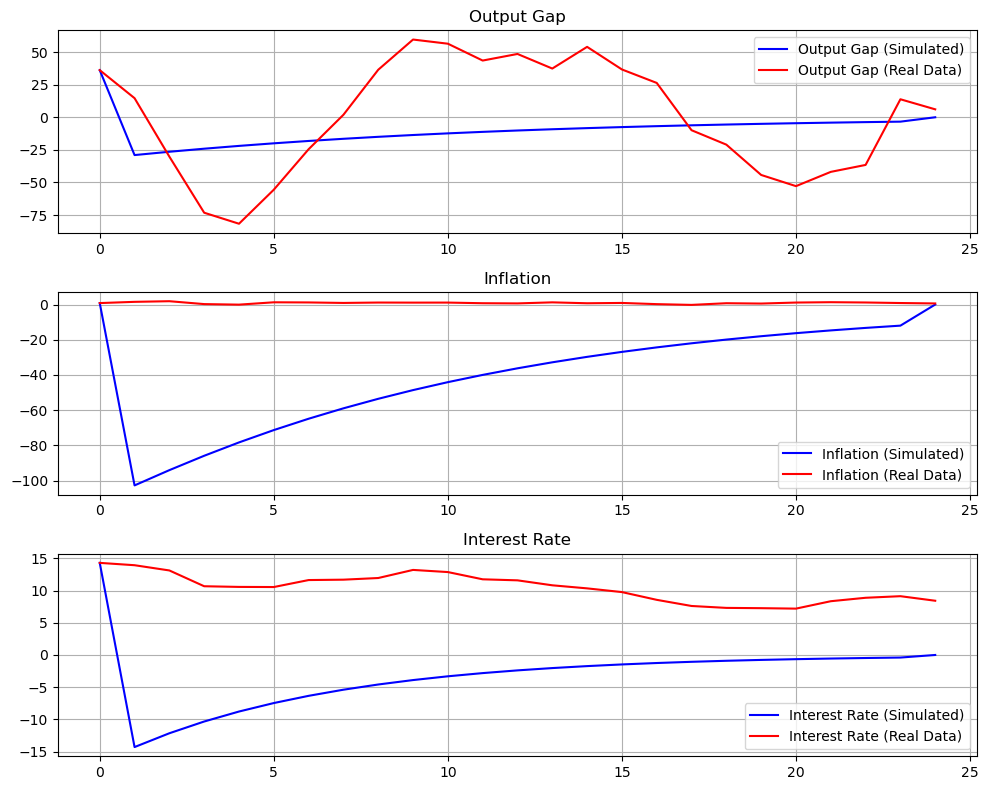

In [6]:
# Use the data directly in the model
pi_real = data['Inflation'].values
y_real = data['OutputGap'].values
i_real = data['InterestRate'].values

# Simulation parameters
T = len(data)  # Length of the dataset

# Arrays for simulation (overwrite with actual data for starting values)
pi = np.zeros(T)
y = np.zeros(T)
i = np.zeros(T)




# Shocks
epsilon_pi = np.zeros(T)   # No shock to inflation
epsilon_y = np.zeros(T)    # No shock to IS curve
epsilon_i = np.zeros(T)  # Monetary policy shock


epi = np.zeros(T)
epy = np.zeros(T)
eppi = np.zeros(T)


i[0] = data['InterestRate'].iloc[0]
y[0] = data['OutputGap'].iloc[0]
pi[0] = data['Inflation'].iloc[0]

epsilon_pi[1] = pi[0]
epsilon_y[1] = y[0]
epsilon_i[1] = i[0]


# Simulate the model
for t in range(1, T-1):
    epy[t] = rhoy*epy[t-1] +epsilon_y[t]
    epi[t] = rhov*epi[t-1] +epsilon_i[t]
    eppi[t] = rhopi*eppi[t-1] +epsilon_pi[t]
    
    i[t] = r_n+ phi_pi * pi[t] + phi_y * y[t] - epi[t]

    y[t] = y[t+1] - (1/sigma) * (i[t] - pi[t+1] - r_n) - epy[t]

    pi[t] = beta * pi[t+1]+((sigma+(phi+alpha)/(1-alpha))*(1-beta*theta)*(1-theta)/(theta))*y[t] + eppi[t]
    
    
    


# Plotting the simulation results alongside actual data
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
time = np.arange(T)
titles = ['Output Gap', 'Inflation', 'Interest Rate']

for ax, real_data, sim_data, title in zip(axes, [y, pi, i], [y_real, pi_real, i_real], titles):
    ax.plot(time, real_data, label=f'{title} (Simulated)', color='blue')
    ax.plot(time, sim_data, label=f'{title} (Real Data)', color='red')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


We see a very big reaction from the model with the starting value, and especially inflation drops immensely and takes a long time to adjust back to the steady state. Furthermore, the outputgap empirically fluctuates meanwhile the model adjusts back to the steady state value. Of course one needs to keep in mind that the outputgap is hit with small shocks empirically during the whole timeframe, meanwhile the model only has the initial "shock" of the starting value.

Next, we expand the model such that the natural real interest rate is no longer set as 0, but instead given by a Fisher equation, thus:
$$
\begin{aligned}
r_{n_t} = i_t-\pi_t 
\end{aligned}
$$

First we run the shock experiment again.

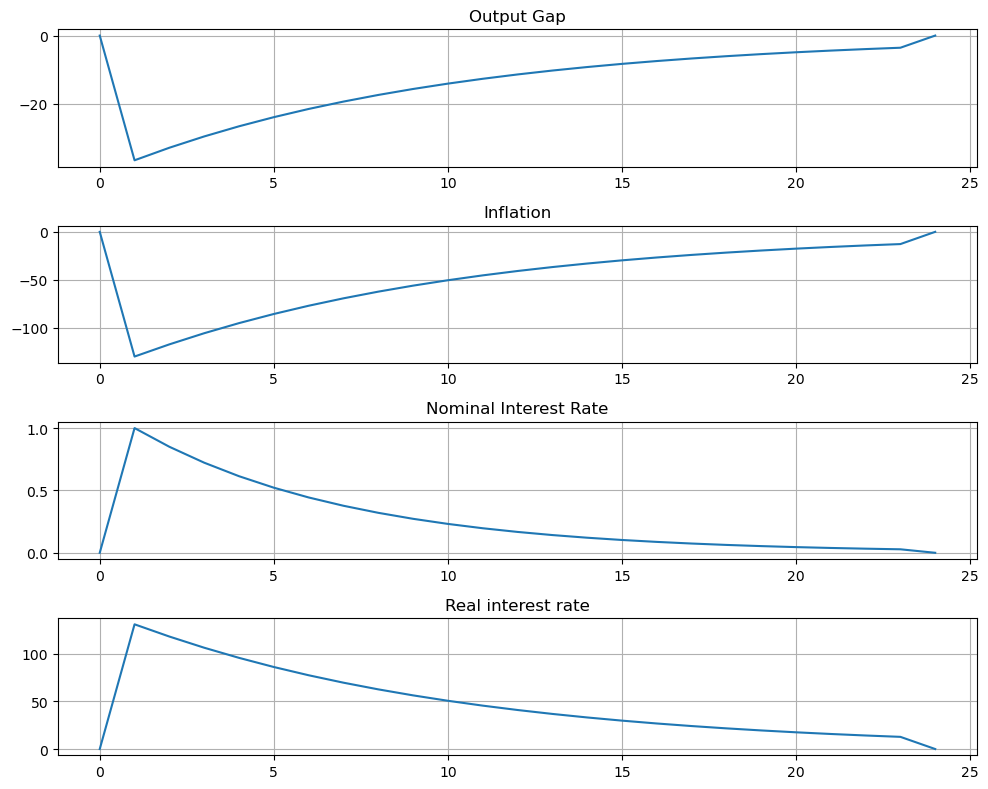

In [10]:
# Time period
T = 25


# Initialize arrays
pi = np.zeros(T)  # Inflation
y = np.zeros(T)   # Output gap
i = np.zeros(T)   # Nominal interest rate
r_n = np.zeros(T)        

shock_size = 1 
epsilon_i = np.zeros(T) 
epsilon_i[1] = -shock_size


# Simulate the model
for t in range(1, T-1):
    epy[t] = rhoy*epy[t-1] +epsilon_y[t]
    epi[t] = rhov*epi[t-1] +epsilon_i[t]
    eppi[t] = rhopi*eppi[t-1] +epsilon_pi[t]

    i[t] = r_n[t] + phi_pi * pi[t] + phi_y * y[t] - epi[t]

    y[t] = y[t+1] - (1/sigma) * (i[t] - pi[t+1] - r_n[t]) - epy[t]

    pi[t] = beta * pi[t+1]+((sigma+(phi+alpha)/(1-alpha))*(1-beta*theta)*(1-theta)/(theta))*y[t] + eppi[t]

    r_n[t]=i[t]-pi[t]
    

# Plotting
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(y, label='Output Gap')
plt.title('Output Gap')
plt.grid(True)

plt.subplot(412)
plt.plot(pi, label='Inflation')
plt.title('Inflation')
plt.grid(True)

plt.subplot(413)
plt.plot(i, label='Nominal Interest Rate')
plt.title('Nominal Interest Rate')
plt.grid(True)

plt.subplot(414)
plt.plot(r_n, label='Real interest rate')
plt.title('Real interest rate')
plt.grid(True)

plt.tight_layout()
plt.show()

Including the real interest rate endogenously makes the model have very high reactions in the outputgap and inflation to a unit shock to the interest rate, which obviously is not very realistic.

Now, also including real life data of the real interest rate in the US, we repeat the same empirical experiment as for the model with 3 equaions.

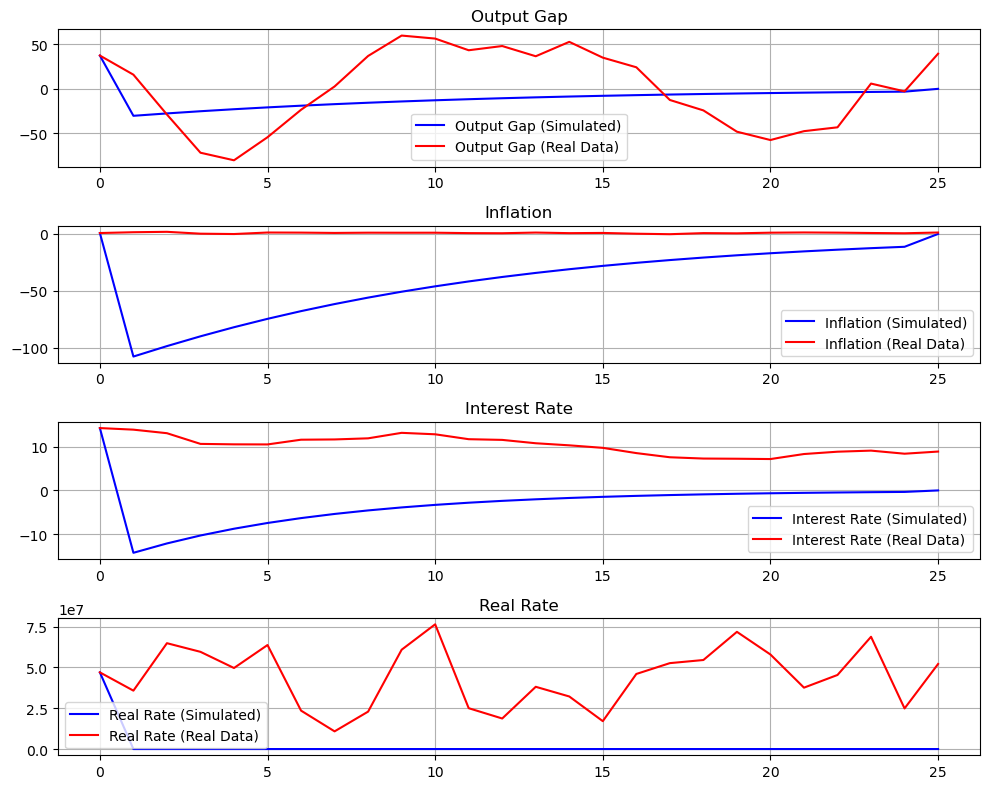

In [144]:
# Use the data directly in the model
pi_real = data['Inflation'].values
y_real = data['OutputGap'].values
i_real = data['InterestRate'].values
r_n_real = data2['RealRate'].values

# Simulation parameters
T = len(data)  # Length of the dataset

# Arrays for simulation (overwrite with actual data for starting values)
pi = np.zeros(T)
y = np.zeros(T)
i = np.zeros(T)
r_n = np.zeros(T) 
epsilon_i = np.zeros(T)


# Shocks
epsilon_pi = np.zeros(T)   # No shock to inflation
epsilon_y = np.zeros(T)    # No shock to IS curve
epsilon_i = np.zeros(T)  # Monetary policy shock


epi = np.zeros(T)
epy = np.zeros(T)
eppi = np.zeros(T)


i[0] = data['InterestRate'].iloc[0]
y[0] = data['OutputGap'].iloc[0]
pi[0] = data['Inflation'].iloc[0]
r_n[0] = data2['RealRate'].iloc[0]

epsilon_pi[1] = pi[0]
epsilon_y[1] = y[0]
epsilon_i[1] = i[0]


# Simulate the model (continue from the first value)
for t in range(1, T-1):
    epy[t] = rhoy*epy[t-1] +epsilon_y[t]
    epi[t] = rhov*epi[t-1] +epsilon_i[t]
    eppi[t] = rhopi*eppi[t-1] +epsilon_pi[t]

    i[t] = r_n[t] + phi_pi * pi[t] + phi_y * y[t] - epi[t]

    y[t] = y[t+1] - (1/sigma) * (i[t] - pi[t+1] - r_n[t]) - epy[t]

    pi[t] = beta * pi[t+1]+((sigma+(phi+alpha)/(1-alpha))*(1-beta*theta)*(1-theta)/(theta))*y[t] + eppi[t]

    r_n[t]=i[t]-pi[t]
    
    
    


# Plotting the simulation results alongside actual data
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
time = np.arange(T)
titles = ['Output Gap', 'Inflation', 'Interest Rate', 'Real Rate']

for ax, real_data, sim_data, title in zip(axes, [y, pi, i, r_n], [y_real, pi_real, i_real, r_n_real], titles):
    ax.plot(time, real_data, label=f'{title} (Simulated)', color='blue')
    ax.plot(time, sim_data, label=f'{title} (Real Data)', color='red')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

And the conclusion is the same as the first empirical example with exogneous real interest rate. Here we also note that the real interest rate doesn't show persistance in the model and imidiately adjsuts back to steady state.